In [112]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\data science\\covid 19 data analysis\\country_wise_latest.csv",encoding="latin3")

In [113]:
print(df.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [114]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [115]:
df = df.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'State'
})

In [116]:
print("Total unique countries:", df['Country'].nunique())

Total unique countries: 187


In [117]:
#filling missing value
df[["Confirmed","Deaths","Recovered"]].fillna(0)

,Confirmed,Deaths,Recovered
0,36263,1269,25198
1,4880,144,2745
2,27973,1163,18837
3,907,52,803
4,950,41,242
...,...,...,...
182,10621,78,3752
183,10,1,8
184,1691,483,833
185,4552,140,2815


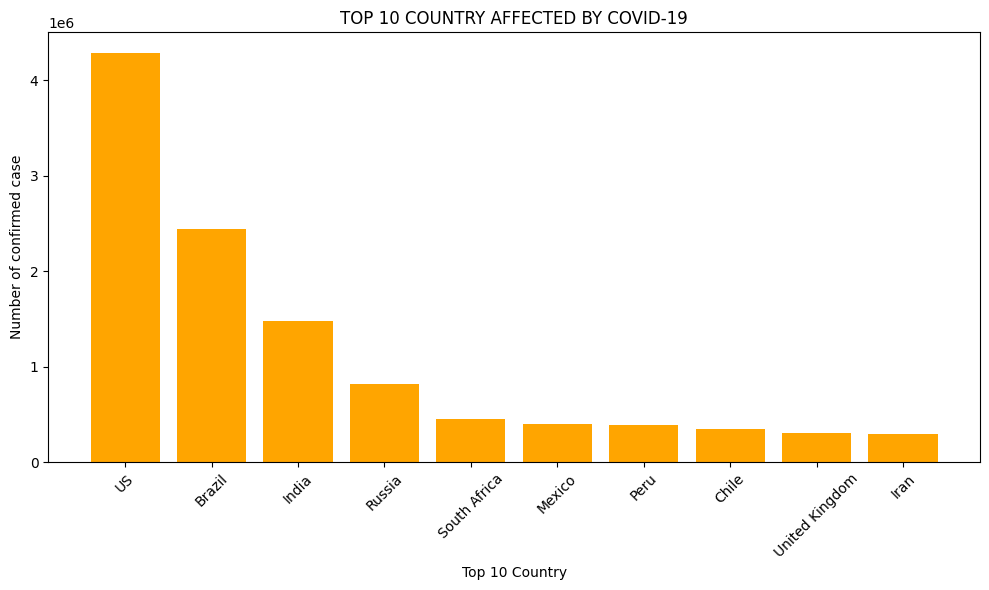

In [118]:
#top 10 country which are affected by covid 19
top_10_country=df.groupby("Country")[["Confirmed"]].sum().sort_values(by='Confirmed', ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
plt.bar(top_10_country["Country"],top_10_country["Confirmed"],color="orange")
plt.title("TOP 10 COUNTRY AFFECTED BY COVID-19")
plt.xlabel("Top 10 Country")
plt.xticks(rotation=45)
plt.ylabel("Number of confirmed case")
plt.tight_layout()
plt.savefig("top 10 country affected by covid 19")
plt.show()

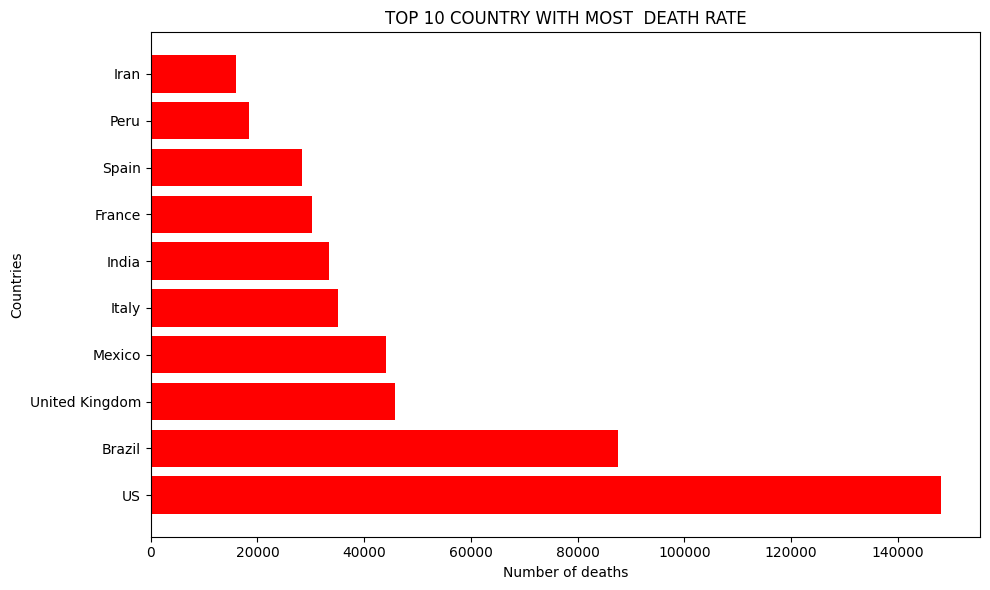

In [119]:
#Top 10 country with most death rates
top_10_country_deaths=df.groupby("Country")[["Deaths"]].sum().sort_values("Deaths",ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
plt.barh(top_10_country_deaths["Country"],top_10_country_deaths["Deaths"],color="RED")
plt.xlabel("Number of deaths")
plt.ylabel("Countries")
plt.title("TOP 10 COUNTRY WITH MOST  DEATH RATE")
plt.tight_layout()
plt.show()

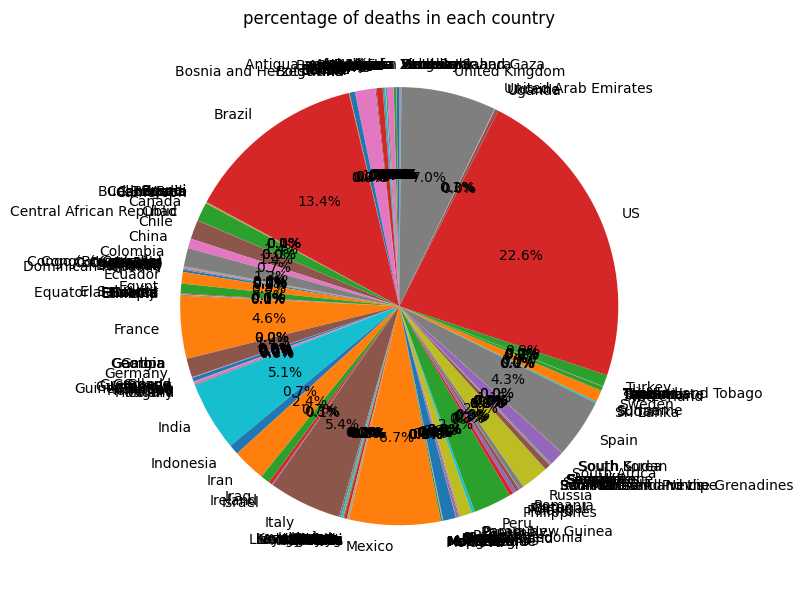

In [120]:
#countries by deaths
top_10_country_deaths=df.groupby("Country")[["Deaths"]].sum().reset_index()
plt.figure(figsize=(10,6))
plt.pie(top_10_country_deaths["Deaths"],labels=top_10_country_deaths["Country"],autopct="%1.1f%%",startangle=90)
plt.title("percentage of deaths in each country")
plt.tight_layout()
plt.savefig("Percentage of deaths in each country.png")
plt.show()

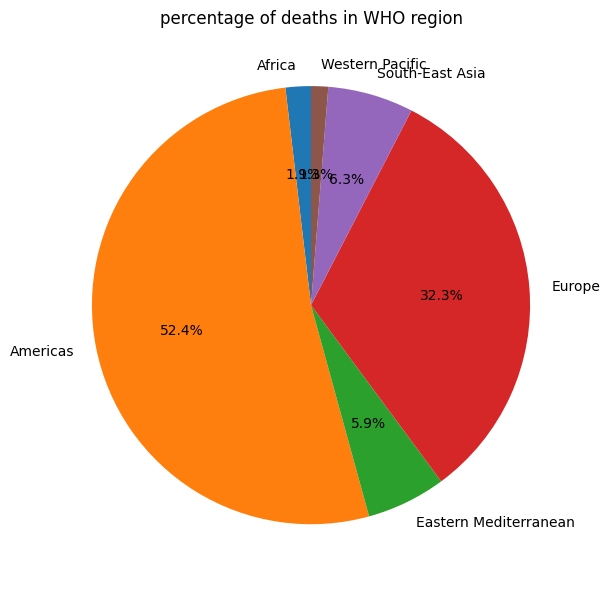

In [121]:
#Deaths  by region
top_10_country_deaths=df.groupby("WHO Region")[["Deaths"]].sum().reset_index()
plt.figure(figsize=(10,6))
plt.pie(top_10_country_deaths["Deaths"],labels=top_10_country_deaths["WHO Region"],autopct="%1.1f%%",startangle=90)
plt.title("percentage of deaths in WHO region")
plt.tight_layout()
plt.savefig("deaths in each regions")
plt.tight_layout()
plt.savefig("percentage of deaths in each region ")
plt.show()

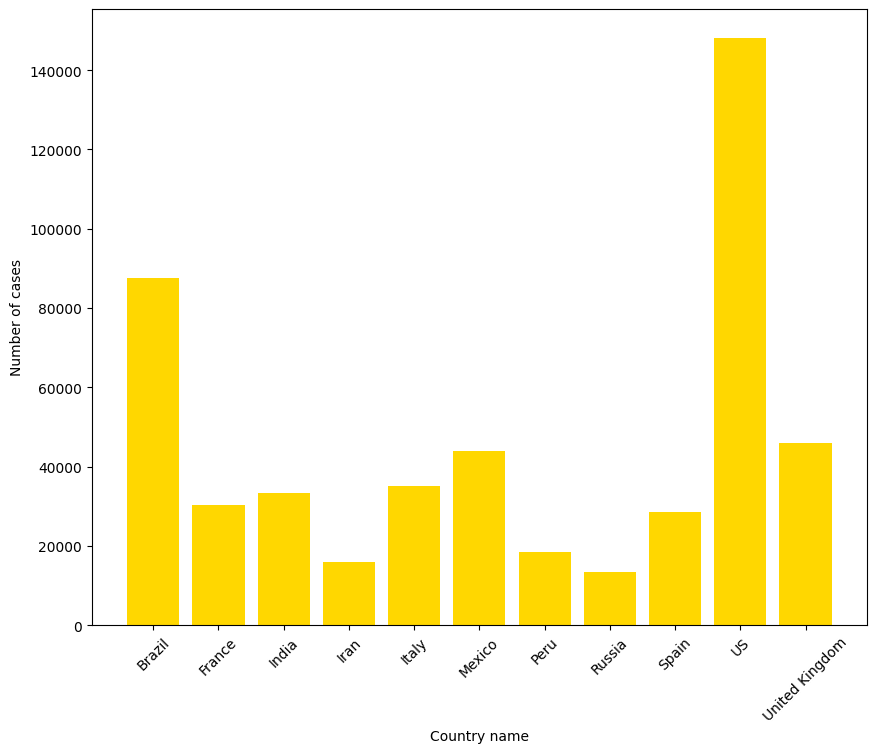

In [122]:
#Countries with deaths of more than 10000 people
deaths_dataframe=df.groupby("Country")[["Deaths"]].sum().reset_index()
deaths_more_than_10k=deaths_dataframe[deaths_dataframe["Deaths"]>9999]
plt.figure(figsize=(10,8))
plt.bar(deaths_more_than_10k["Country"],deaths_more_than_10k["Deaths"],color="gold")
plt.xlabel("Country name")
plt.ylabel("Number of cases")
plt.title("")
plt.xticks(rotation=45)
plt.savefig("Countries with deaths of more than 10000 people.png")
plt.show()


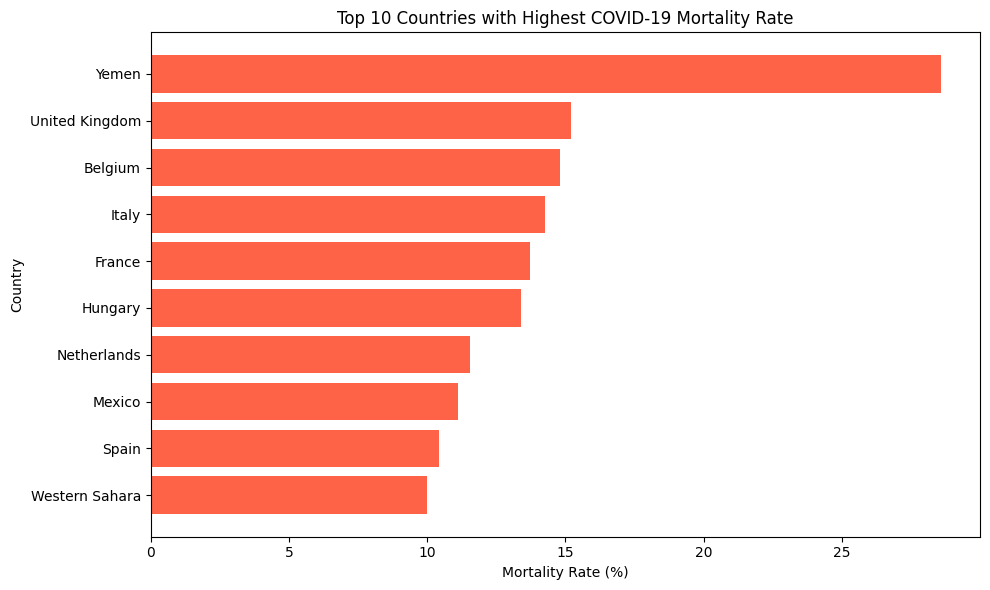

In [123]:

# Calculate Mortality Rate (%)
df["Mortality Rate (%)"] = (df["Deaths"] / df["Confirmed"]) * 100

# Handle cases where Confirmed = 0 (to avoid division by zero)
df["Mortality Rate (%)"] = df["Mortality Rate (%)"].fillna(0)

# Sort and select top 10 countries by mortality rate
top_10_mortality = df.sort_values(by="Mortality Rate (%)", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_10_mortality["Country"], top_10_mortality["Mortality Rate (%)"], color="tomato")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest COVID-19 Mortality Rate")
plt.gca().invert_yaxis()  # Highest rate at top
plt.tight_layout()
plt.savefig("Top 10 Countries with Highest COVID-19 Mortality Rate")
plt.show()


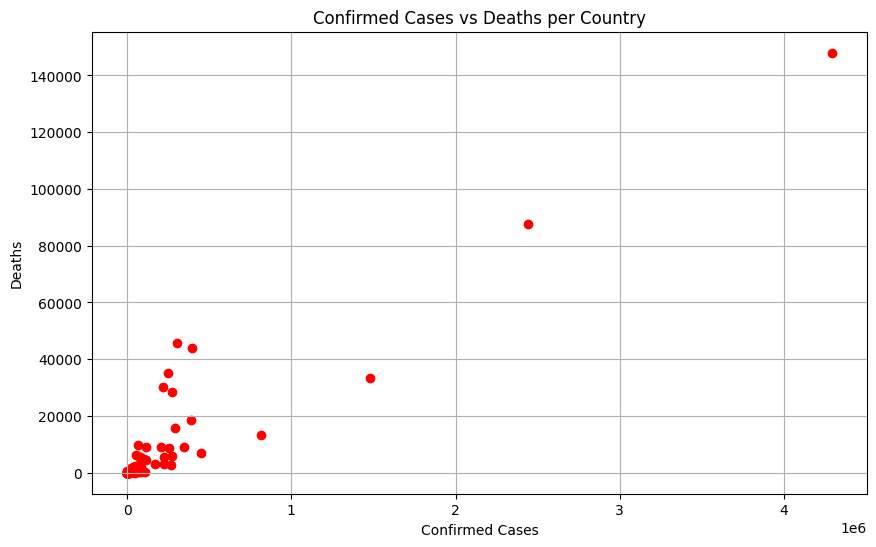

In [124]:
summary = df.groupby('Country')[['Confirmed', 'Deaths']].sum().reset_index()
plt.figure(figsize=(10,6))
plt.scatter(summary['Confirmed'], summary['Deaths'], color='red')
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.title("Confirmed Cases vs Deaths per Country")
plt.grid(True)
plt.savefig("Confirmed Cases vs Deaths per Country")
plt.show()
